In [1]:
%load_ext autoreload
%autoreload 2
from RTKToArrayConversion import *
from ConeBeamDCCWithBackprojectionPlane import *
from AllAcquisitionBPClass import *
from TextFileSaving import *

In [3]:
filesdir_ref = "/home/mmouchet/Documents/SIEMENSDATA/GO.SIM/phantom/14_12_21/3D/donneesBrutes/inspi_bloquee/"
# reading projections
proj = itk.imread(filesdir_ref+"sub48_corrected_proj.mha")
# Reading the geometry of the scanner
xmlreader = rtk.ThreeDCircularProjectionGeometryXMLFileReader.New()
xmlreader.SetFilename(filesdir_ref+'sub48_geometry.xml')
# xmlreader.SetFilename(filesdir_ref+"geometry.xml")
xmlreader.GenerateOutputInformation()
geometry = xmlreader.GetOutputObject()
print('nproj = %d'%(len(geometry.GetGantryAngles())))
print(proj.GetLargestPossibleRegion().GetSize())

nproj = 625
itkSize3 ([920, 32, 625])


In [4]:
geometry_array = RTKtoNP(geometry)
proj_array = itk.GetArrayFromImage(proj)
proj_infos = GetProjectionInformations(proj)
source_pos_array = GetSourcePositions(geometry)
rotation_matrices_array = GetRotationMatrices(geometry)
fixed_matrices_array = GetFixedSystemMatrices(geometry)
print(proj_infos)

AcquiDCC = DCCWithBPinAnAcquisition(geometry_array, source_pos_array, rotation_matrices_array, fixed_matrices_array, proj_array, proj_infos)
AcquiDCC.ComputeAllPossiblePairs()
print(AcquiDCC.d, AcquiDCC.P)

[array([1.02806101, 1.0947541 , 1.        ]), array([0., 0., 0.]), array([920,  32, 625]), array([[ 1.,  0.,  0.],
       [ 0., -1.,  0.],
       [ 0.,  0.,  1.]])]



25638
12819
15.230000000000018 0.868390881147542


In [10]:
# Fonction non parallélisée 
AcquiDCC.ComputeDCCForAllPairs()

# AcquiDCC.ComputeDCCForAllPairsPara()
#AcquiDCC.pairs

0

In [11]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(range(AcquiDCC.n_proj))
G.add_weighted_edges_from(AcquiDCC.pairs)
print(G.number_of_nodes(), G.number_of_edges())
length, path = nx.single_source_dijkstra(G, 0)

937 28775


<IPython.core.display.Javascript object>


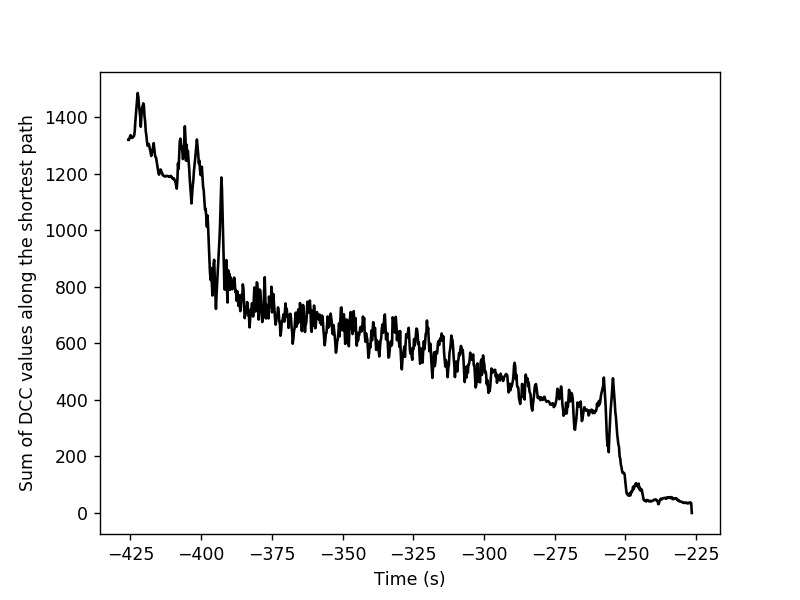

In [12]:
import matplotlib.pyplot as plt
%matplotlib notebook

fit = np.polyfit(np.arange(AcquiDCC.n_proj), [len(path[i]) for i in range(AcquiDCC.n_proj)],1)

plt.figure()
plt.plot(geometry_array[8, :],[length[i] for i in range(AcquiDCC.n_proj)],'k')
# plt.plot(np.arange(AcquiDCC.n_proj)*0.35/35,[length[i] for i in range(AcquiDCC.n_proj)],'k')
plt.ylabel("Sum of DCC values along the shortest path")
plt.xlabel("Time (s)")
# # # ax=plt.twinx()
# plt.plot(np.arange(AcquiDCC.n_proj)*0.35/72,[len(path[i]) for i in range(AcquiDCC.n_proj)],color='red')
# plt.plot(geometry_array[8,:], fit[0]*geometry_array[8,:]+fit[1],'k--')
plt.show()

In [ ]:
graph_dir = "/home/mmouchet/PycharmProjects/4D_study/bpm_12/"
WritePairsFile(graph_dir + "graph_ideal_Tresp5.csv", AcquiDCC.pairs)

In [2]:
# pair_rl = ReadPairs("/home/mmouchet/Documents/SIEMENSDATA/GO.SIM/3D_patients/BN1/donneesBrutes/bn1_rl_graph.csv")
# pair_ib = ReadPairs("/home/mmouchet/Documents/SIEMENSDATA/GO.SIM/3D_patients/BN1/donneesBrutes/bn1_ib_graph.csv")

# xmlreader = rtk.ThreeDCircularProjectionGeometryXMLFileReader.New()
# xmlreader.SetFilename("/home/mmouchet/Documents/SIEMENSDATA/GO.SIM/3D_patients/BN1/donneesBrutes/inspi_bloquee/sub_geometry.xml")
# xmlreader.GenerateOutputInformation()
# bn1_ib_geo = xmlreader.GetOutputObject()

# xmlreader = rtk.ThreeDCircularProjectionGeometryXMLFileReader.New()
# xmlreader.SetFilename("/home/mmouchet/Documents/SIEMENSDATA/GO.SIM/3D_patients/BN1/donneesBrutes/respi_libre/sub_geometry.xml")
# xmlreader.GenerateOutputInformation()
# bn1_rl_geo = xmlreader.GetOutputObject()


# bn1_ib_geo_ar = RTKtoNP(bn1_ib_geo)
# bn1_rl_geo_ar =RTKtoNP(bn1_rl_geo)

pair_rl = ReadPairs("/home/mmouchet/PycharmProjects/4D_study/bpm_12/graph_bpm12.csv")
pair_ib = ReadPairs("/home/mmouchet/PycharmProjects/4D_study/bpm_12/graph_bpm12_noise.csv")


In [13]:
import networkx as nx
import matplotlib.pyplot as plt
# %matplotlib notebook

G_ib = nx.Graph()
G_ib.add_weighted_edges_from(pair_ib)
print(G_ib.number_of_nodes(), G_ib.number_of_edges())
length_ib, path_ib = nx.single_source_dijkstra(G_ib, 0)
# fit_ib = np.polyfit(bn1_ib_geo_ar[8,:], [len(path_ib[i]) for i in range(G_ib.number_of_nodes())],1)

# G_rl = nx.Graph()
# G_rl.add_weighted_edges_from(pair_rl)
# print(G_rl.number_of_nodes(), G_rl.number_of_edges())
# length_rl, path_rl = nx.single_source_dijkstra(G_rl, 0)
# fit_rl = np.polyfit(bn1_rl_geo_ar[8,:], [len(path_rl[i]) for i in range(G_rl.number_of_nodes())],1)

# plt.figure()
# plt.plot(bn1_ib_geo_ar[8,:],[length_ib[i] for i in range(G_ib.number_of_nodes())],label="ib")
# plt.plot(bn1_rl_geo_ar[8,:],[length_rl[i] for i in range(G_rl.number_of_nodes())],label="rl")
# plt.legend()
# plt.show()

# plt.figure()
# plt.plot(bn1_ib_geo_ar[8,:],[length_ib[i] for i in range(G_ib.number_of_nodes())],label="ib")
# plt.plot(bn1_rl_geo_ar[8,:],[length_rl[i] for i in range(G_rl.number_of_nodes())],label="rl")
# plt.legend()
# plt.show()



10035 2256846


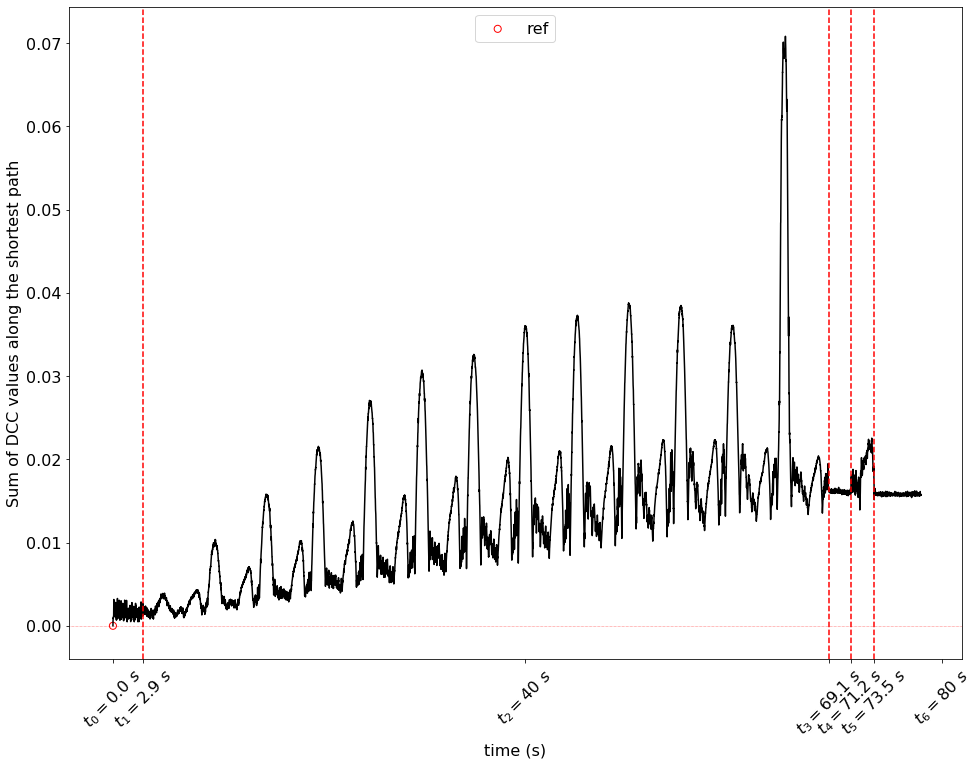

In [14]:
plt.figure(figsize=(16,12))
plt.rcParams['font.size'] = '16'
plt.plot(np.arange(G_ib.number_of_nodes())*0.35/45,[length_ib[i] for i in range(G_ib.number_of_nodes())],'k')
# plt.plot(np.arange(G_rl.number_of_nodes())*0.35/45,[length_rl[i] for i in range(G_rl.number_of_nodes())],label="rl")
plt.axhline(y=0,color='r', linewidth=0.5,linestyle=':')
plt.axvline(x=375*0.35/45, color = 'red', linestyle = '--')
plt.axvline(x=8890*0.35/45, color = 'red', linestyle = '--')
plt.axvline(x=9160*0.35/45, color = 'red', linestyle = '--')
plt.axvline(x=9455*0.35/45, color = 'red', linestyle = '--')
plt.scatter(0*0.35/45, 0, s=50, facecolors='none', edgecolors='red', label='ref')
plt.xlabel("time (s)")
plt.ylabel("Sum of DCC values along the shortest path")
plt.xticks(np.array([0, 375, 5120, 8890, 9160, 9455, 10290])*0.35/45, [r"$t_0=0.0~s$", r"$t_1=2.9~s$",r"$t_2=40~s$",r"$t_3=69.1~s$",r"$t_4=71.2~s$",r"$t_5=73.5~s$",r"$t_6=80~s$",],rotation=45 )
plt.legend()
# plt.savefig("/home/mmouchet/PycharmProjects/4D_study/bpm_12/ref0.pdf")
plt.show()

In [ ]:
phantom = itk.imread("/home/mmouchet/Documents/Forbild/Thorax_motion/phantomStatic.mha")
phantom_ar = itk.GetArrayFromImage(phantom)
y = np.linspace(phantom.GetOrigin()[0], 
                phantom.GetOrigin()[0]+(phantom.GetLargestPossibleRegion().GetSize()[0]-1)*phantom.GetSpacing()[0])
z = np.linspace(phantom.GetOrigin()[1], 
                phantom.GetOrigin()[1]+(phantom.GetLargestPossibleRegion().GetSize()[1]-1)*phantom.GetSpacing()[1])
x = np.linspace(phantom.GetOrigin()[2], 
                phantom.GetOrigin()[2]+(phantom.GetLargestPossibleRegion().GetSize()[2]-1)*phantom.GetSpacing()[2])
plt.figure()
plt.imshow(phantom_ar[phantom_ar.shape[0]//2,:,:], cmap = "gray", extent=(x[0], x[-1], z[-1], z[0]))
plt.axhline(y=-110, color = 'r', linestyle = '--')
plt.axhline(y=-98.8, color = 'y', linestyle = '--')
plt.axhline(y=154.7, color = 'y', linestyle = '--')
plt.axhline(y=162.8, color = 'y', linestyle = '--')
plt.axhline(y=171.5, color = 'y', linestyle = '--')
plt.axhline(y=196.4, color = 'r', linestyle = '--')
plt.yticks(np.array([0, 375, 5120, 8890, 9160, 9455, 10290])*1.34/45-110, [r"$t_0$", r"$t_1$    ",r"$t_2$",r"$t_3$    ",r"$t_4$",r"$t_5$    ",r"$t_6$"], fontsize = 14)
plt.show()
# plt.savefig("/home/mmouchet/PycharmProjects/4D_study/bpm_12/acqui.pdf")

In [ ]:
np.array([0, 375, 8890, 9160, 9455, 10290])*1.34/45 -110